In [1]:
# import necessary packages
import os
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from collections import OrderedDict

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

In [3]:
# open curated data
df = pd.read_csv("ModelMat.csv",sep= ';')

# account for unwanted indexing columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
# analyze curated data
print(f'Full DataFrame shape: {df.shape}')
df.head(10)

Full DataFrame shape: (14094, 38)


,CSD_Code,Electronic_E,Dispersion_E,Dipole_M,Metal_q,HL_Gap,HOMO_Energy,LUMO_Energy,Polarizability,SMILES_x,...,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,Kappa1,Kappa2,Kappa3
0,ILOJOK,-3314.579807,-0.287378,2.9470,1.77729,0.09247,-0.17508,-0.08261,726.729174,[Y]1234(N(c5c(cccc5C)C)[C]5C=CC=C(N15)N(c1c(cc...,...,32.206403,20.415955,37.141424,16.613984,42.264178,14.666631,47.252050,47.251005,15.392752,5.377803
1,YIXHOE,-3380.956110,-0.180335,4.1099,1.16190,0.12814,-0.18742,-0.05928,570.504772,[Sc]123(OC(=C[C](O1)c1cn(nc1C)C)c1cn(nc1C)C)(O...,...,23.293914,15.580122,22.296306,10.665243,17.552245,8.373630,16.184174,38.164878,12.565262,5.961867
2,PIXGUZ,-2801.904824,-0.207864,5.8632,1.45486,0.11674,-0.17998,-0.06324,525.683935,[Sc]1(N([P](c2c(N1c1c(cccc1C(C)C)C(C)C)cccc2)(...,...,23.723608,14.043402,24.940493,9.692162,22.788036,7.807387,23.805086,31.961193,12.654398,5.248840
3,BUQHIF,-2163.198924,-0.210461,5.4970,1.86123,0.12360,-0.19645,-0.07285,558.799426,[Y]123(n4c([N]C(C)C)c5ccccc5c4N1C(C)C)(n1c([N]...,...,27.307880,17.592047,34.017453,12.737992,40.233951,12.512649,47.776676,33.983320,10.439854,3.143713
4,UGEBEO,-3053.451555,-0.217075,2.8334,1.52294,0.11709,-0.18930,-0.07221,571.489065,[Sc]1(N(C(=C[C](N1c1cc(cc(c1)C(C)(C)C)C(C)(C)C...,...,29.552864,21.368239,41.408131,9.873548,36.436709,7.908561,42.126337,39.521789,12.759085,9.197370
5,FEKQEU,-5089.111357,-0.192483,8.0428,1.31223,0.08387,-0.21036,-0.12649,545.413980,[Y]12(Oc3c(Cl)cc(cc3Cl)N(=O)=O)(Oc3c(Cl)cc(N(=...,...,25.277461,12.445500,29.041030,9.516538,29.656487,7.307239,30.053959,39.275461,13.898717,5.971983
6,GOHPOJ,-2691.005537,-0.121161,1.9966,1.76764,0.08772,-0.20518,-0.11746,411.308536,[Y]123(O[C](C(F)(F)F)C=C(O1)c1ccccc1)(O[C](C(F...,...,20.589620,10.490102,20.955730,6.996809,17.189564,5.009857,16.027207,34.417879,11.572589,6.471786
7,NOLQIP,-3557.701942,-0.292458,2.7593,1.03135,0.11629,-0.16282,-0.04653,670.989797,[Sc](N(c1c(P(C(C)C)C(C)C)cc(C)cc1)c1ccc(C)cc1P...,...,27.188705,18.476820,28.165803,11.128791,20.839276,8.675180,19.206886,46.696991,20.317554,10.786640
8,AGUFIR,-5021.920045,-0.426233,3.6657,1.52758,0.12072,-0.17527,-0.05455,990.140376,c1(ccccc1)P(c1ccccc1)N(P(c1ccccc1)c1ccccc1)[La...,...,40.217197,19.204969,47.904106,13.858311,54.951822,10.309595,72.124063,56.760759,28.720247,13.138203
9,DIFSUJ,-3501.667658,-0.283458,9.8759,1.41656,0.11636,-0.17703,-0.06067,675.439338,[Sc](Oc1c(cccc1C(C)(C)C)C(C)(C)C)(Oc1c(cccc1C(...,...,26.539264,21.542257,28.344093,11.798067,20.396921,9.126808,18.266421,46.013512,16.990864,9.748219


# Separate the DataFrame into your input variables ($X$) and target variables ($y$)

In [5]:
# set input variables
X = df[['ExactMolWt',
    'FpDensityMorgan1',
    'FpDensityMorgan2',
    'FpDensityMorgan3',
    'HeavyAtomMolWt',
    'MolWt',
    'NumRadicalElectrons',
    'NumValenceElectrons',
     'Chi0',
     'Chi0n',
     'Chi0v',
     'Chi1',
     'Chi1n',
     'Chi1v',
     'Chi2n',
     'Chi2v',
     'Chi3n',
     'Chi3v',
     'Chi4n',
     'Chi4v',
    'Kappa1',
     'Kappa2',
     'Kappa3']]

# set single target variable
y = df[['Metal_q']]

# List of potential target variables for multi-dimensional models later:
# Electronic_E, Dispersion_E, Dipole_M, Metal_q, HL_Gap, HOMO_Energy, LUMO_Energy, Polarizability

In [6]:
# analyze shape of input and target variables
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (14094, 23)
Shape of y: (14094, 1)


In [7]:
# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [8]:
# analyze shape of training, test, and validation sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)

(8456, 23)
(2819, 23)
(8456, 1)
(2819, 1)


In [9]:
# create functions for instantiating, fitting, and evaluating models
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train.values.ravel())
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_act_val):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_act_val)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    return model, result_dict

In [10]:
# create functions for storing models and their results
def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

In [11]:
# create dataframe for storing models
df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_val',
                                    'mae_val',
                                    'rmse_val'])

In [12]:
# build a dictionary of model names
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'knr': KNeighborsRegressor,
})

In [13]:
# instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# keep track of elapsed time
ti = time()

# loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_val)
    df_classics = append_result_df(df_classics, result_dict)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor
Now fitting and evaluating model rr: Ridge
Now fitting and evaluating model abr: AdaBoostRegressor
Now fitting and evaluating model gbr: GradientBoostingRegressor
Now fitting and evaluating model rfr: RandomForestRegressor
Now fitting and evaluating model etr: ExtraTreesRegressor
Now fitting and evaluating model svr: SVR
Now fitting and evaluating model lsvr: LinearSVR


C:\Users\adsnyder\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Now fitting and evaluating model knr: KNeighborsRegressor
Finished fitting 9 models, total time: 52.99 s


In [14]:
# sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_val')

In [15]:
# plot predicted vs actual values for a given model
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xmax = np.max(act)
    xmax = float(xmax)
    ymax = np.max(pred)
    xy_max = np.max([xmax, ymax])
    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {np.abs(r2_score(act, pred)):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

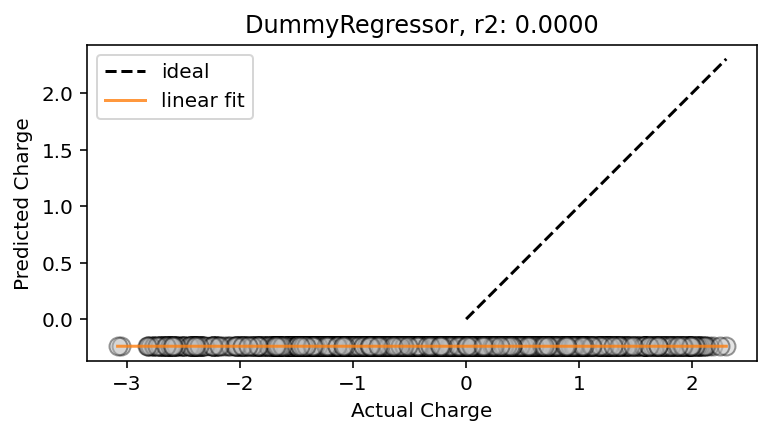

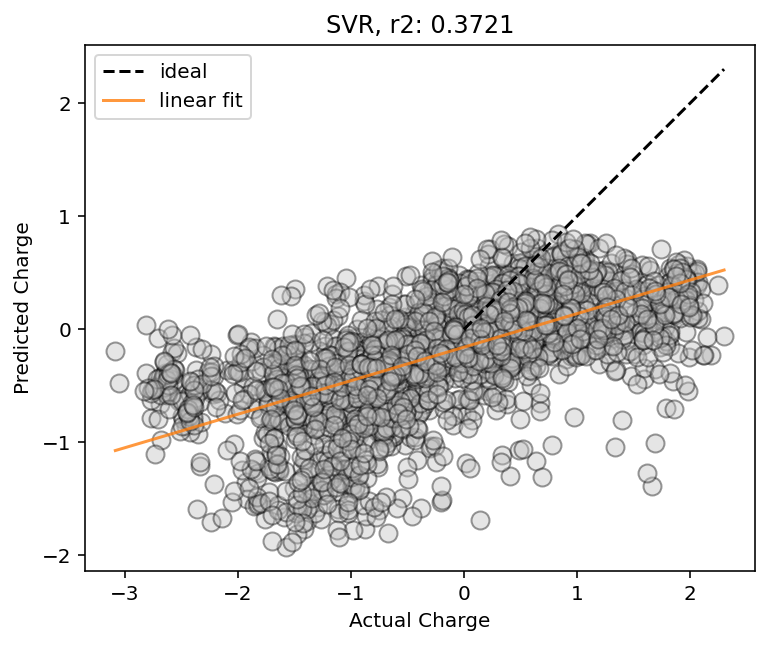

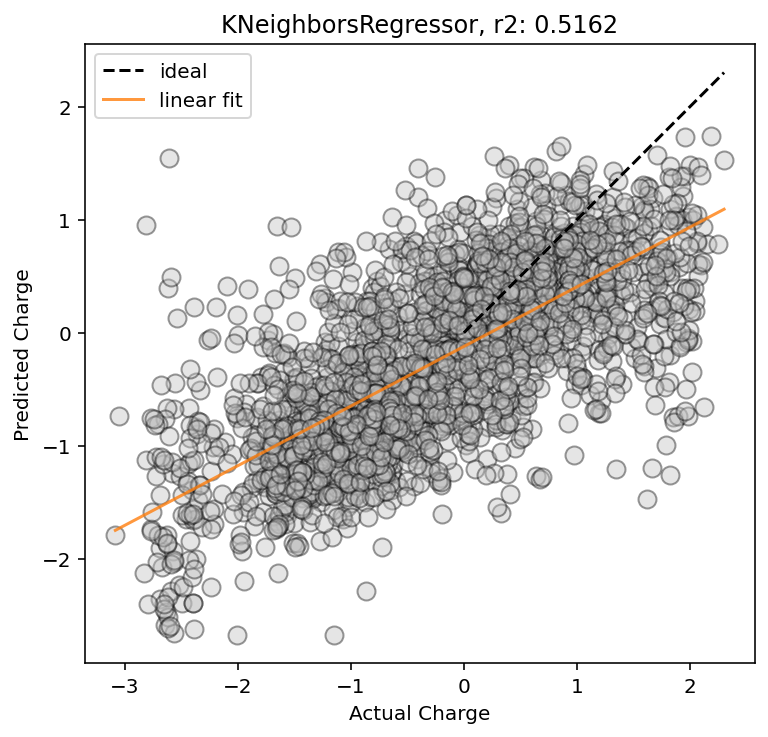

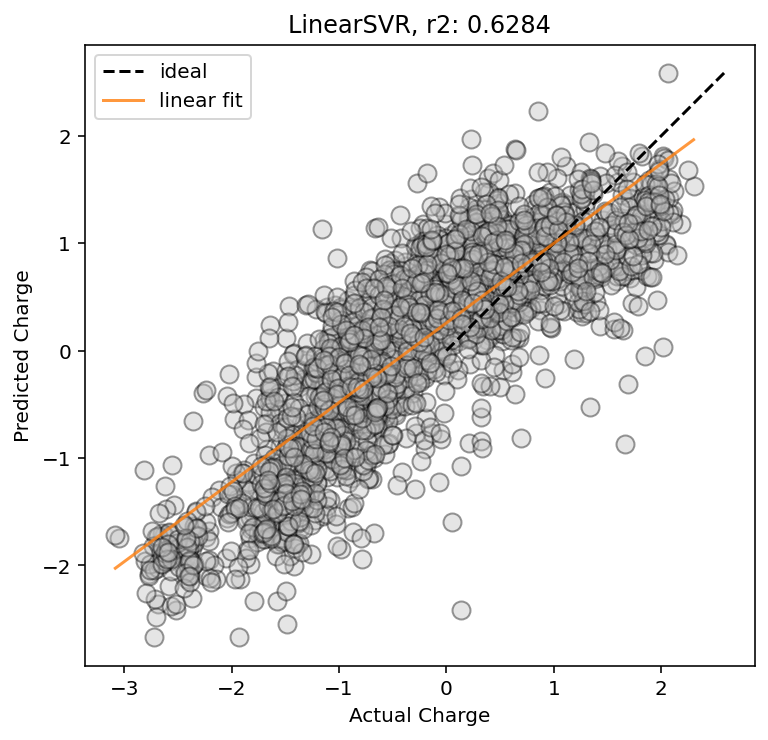

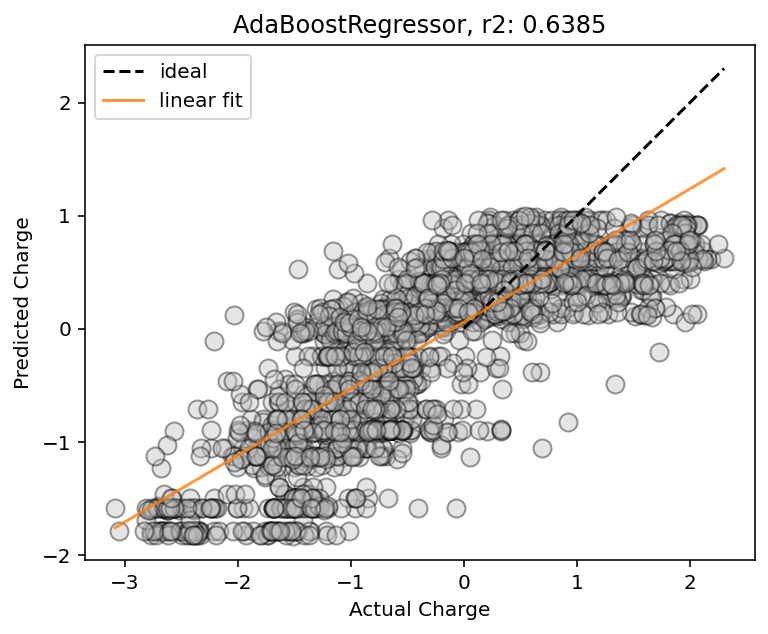

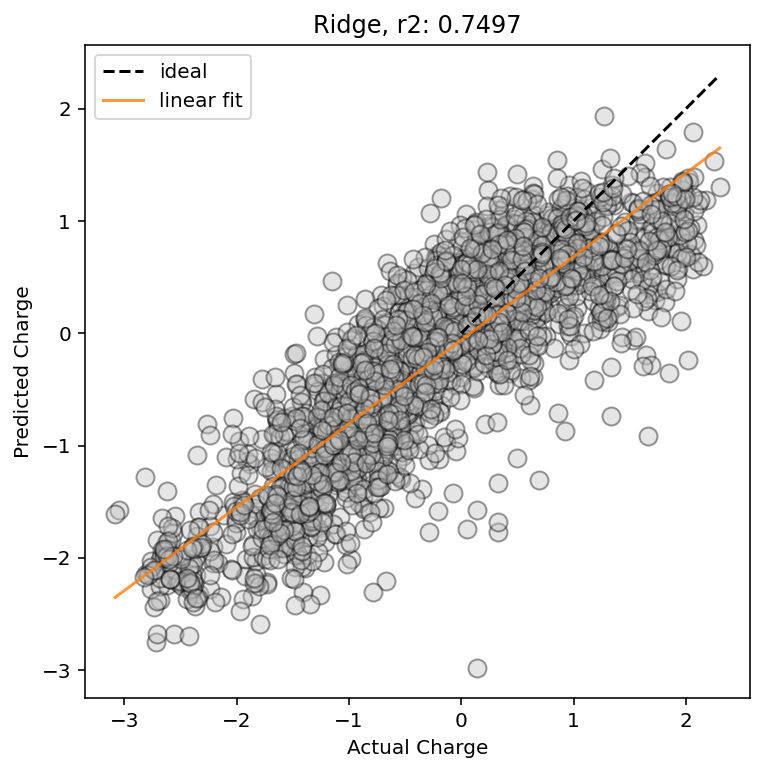

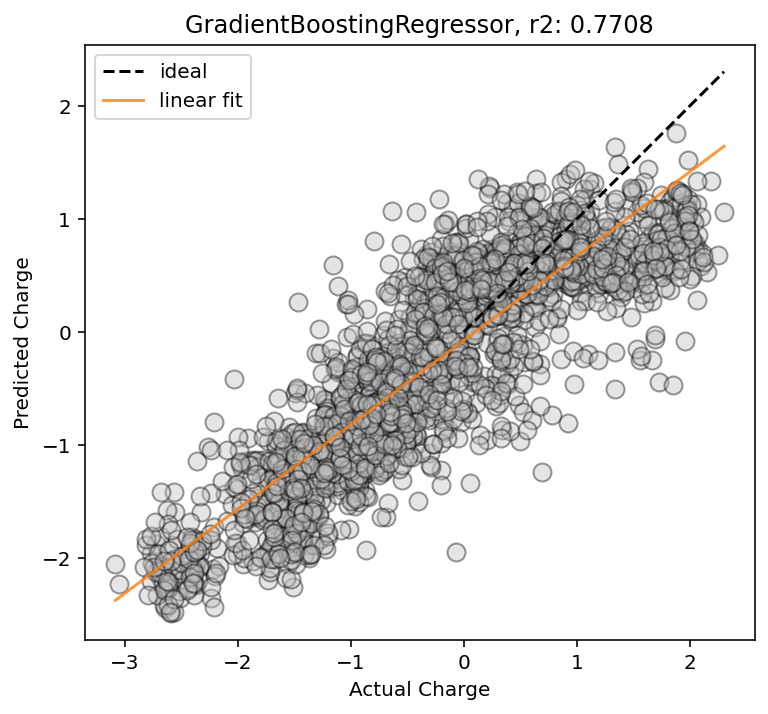

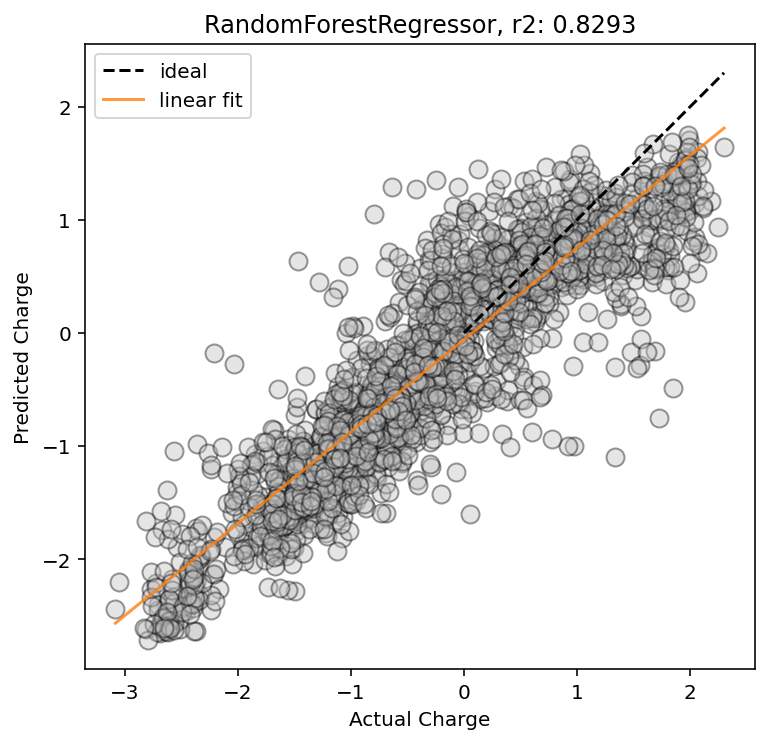

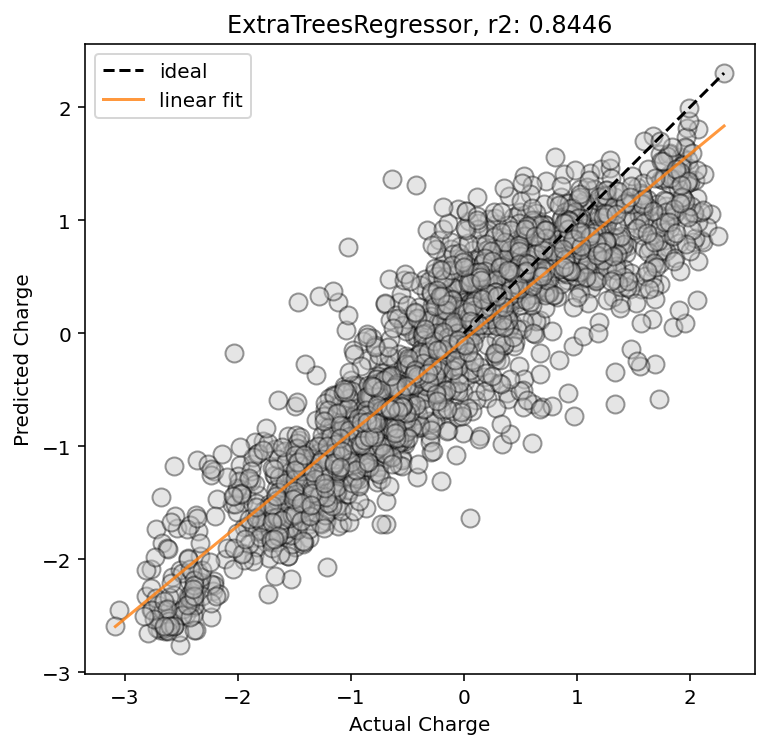

In [16]:
# loop through each model type and plot predicted vs actual values
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']
    model = classic_models[model_name]
    
    y_act_val = y_val
    y_act_val = y_act_val['Metal_q'].tolist()
    y_pred_val = model.predict(X_val)
    
    plot = plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='Charge')

In [17]:
# find the best-performing model that we have tested
best_row = df_classics.iloc[-1, :].copy()

# get the model type and model parameters
model_name = best_row['model_name']
model_params = best_row['model_params']

# instantiate the model again using the parameters
model = classic_model_names[model_name](**model_params)

In [18]:
# analyze chosen model
print(model)

ExtraTreesRegressor()


In [19]:
# Concatenate the train and validation datasets together
X_train_new = np.concatenate((X_train, X_val), axis=0)
y_train_new = pd.concat((y_train, y_val), axis=0)

In [20]:
# analyze training set shape
print(X_train_new.shape)

(11275, 23)


In [21]:
# analyze time to fit chosen model
ti = time()
model.fit(X_train_new, y_train_new)
dt = time() - ti
print(f'Finished fitting best model, total time: {dt:0.2f} s')

C:\Users\adsnyder\AppData\Local\Temp/ipykernel_6872/2502772179.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_new, y_train_new)


Finished fitting best model, total time: 9.37 s


In [22]:
# use model to predict results of test data
y_act_test = y_test
y_pred_test = model.predict(X_test)

# evaluate model
r2, mae, rmse = evaluate_model(model, X_test, y_act_test)

C:\Users\adsnyder\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(
C:\Users\adsnyder\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [23]:
# analyze test data results
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'rmse: {rmse:0.4f}')
act_list = y_act_test['Metal_q'].tolist()

r2: 0.8558
mae: 0.2600
rmse: 0.4010


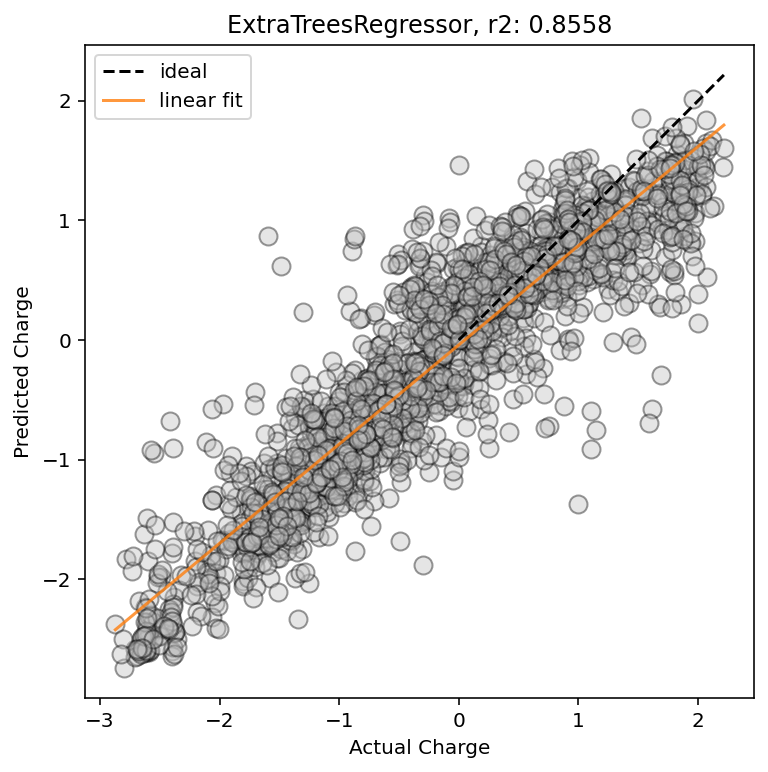

In [24]:
# plot test data results
plot = plot_pred_act(act_list, y_pred_test, model, reg_line=True, label='Charge')